In [16]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    raise RuntimeError("This script needs the matplotlib library")

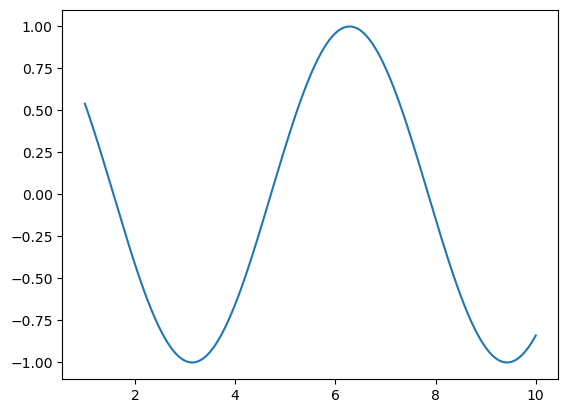

In [17]:
# import numpy: the module providing numerical arrays
import numpy as np

t = np.linspace(1, 10, 2000)

plt.plot(t, np.cos(t))

In [18]:

from nilearn import datasets

print(f"Datasets are stored in: {datasets.get_data_dirs()!r}")

Datasets are stored in: ['/Users/sreeku/nilearn_data']


In [19]:
motor_images = datasets.fetch_neurovault_motor_task()
motor_images.images

[get_dataset_dir] Dataset found in /Users/sreeku/nilearn_data/neurovault

['/Users/sreeku/nilearn_data/neurovault/collection_658/image_10426.nii.gz']

In [20]:
tmap_filename = motor_images.images[0]

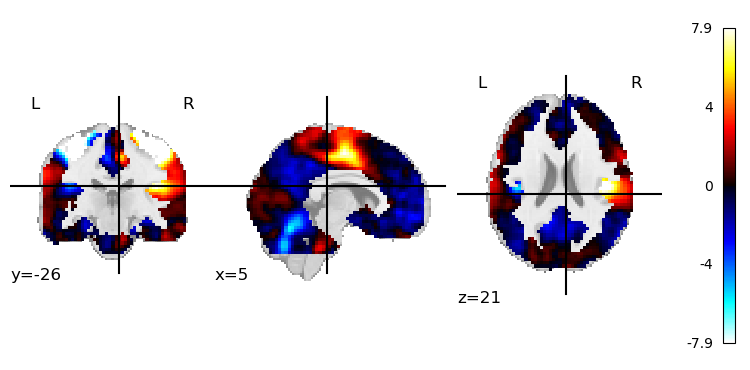

In [21]:
from nilearn import plotting

plotting.plot_stat_map(tmap_filename)

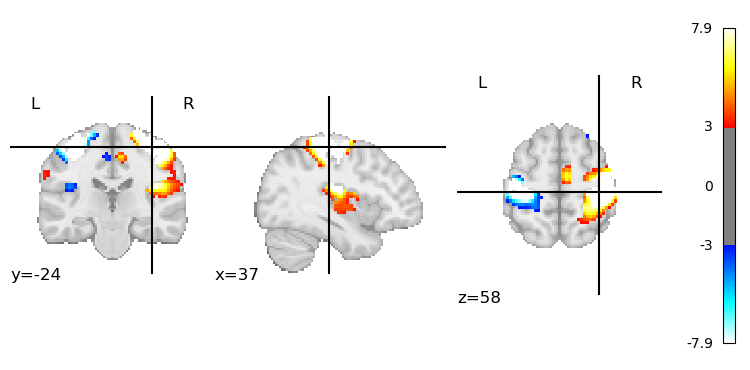

In [22]:
plotting.plot_stat_map(tmap_filename, threshold=3)

In [23]:
rsn = datasets.fetch_atlas_smith_2009(resting=True, dimension=10)["maps"]
rsn

[get_dataset_dir] Dataset found in /Users/sreeku/nilearn_data/smith_2009

'/Users/sreeku/nilearn_data/smith_2009/PNAS_Smith09_rsn10.nii.gz'

(91, 109, 91, 10)
(91, 109, 91)


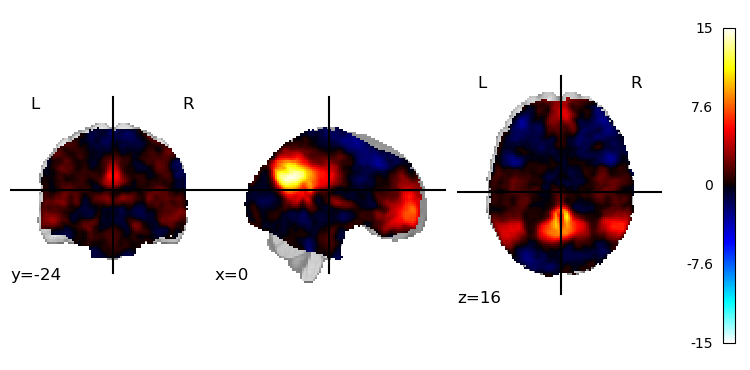

In [24]:
from nilearn import image

print(image.load_img(rsn).shape)

first_rsn = image.index_img(rsn, 3)
print(first_rsn.shape)

plotting.plot_stat_map(first_rsn)

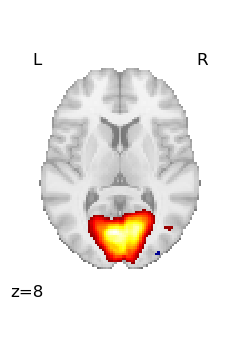

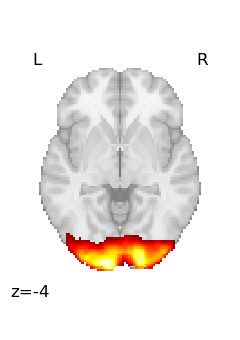

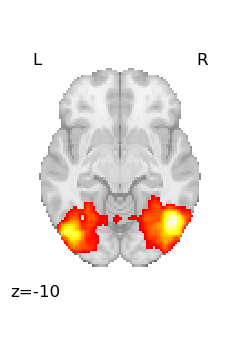

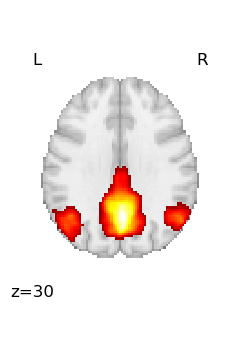

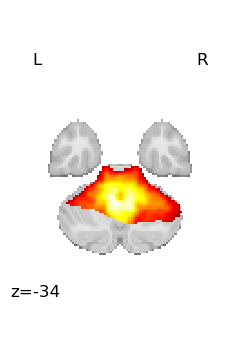

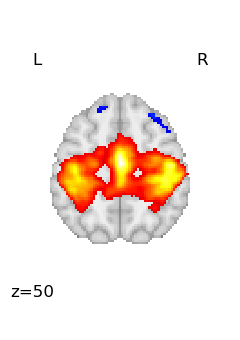

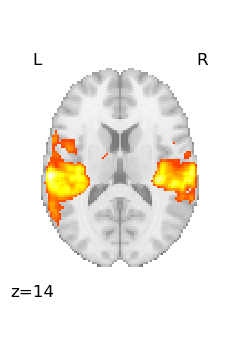

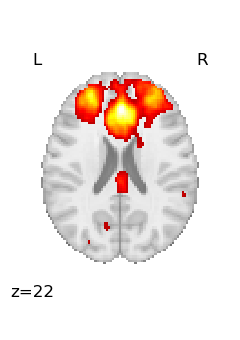

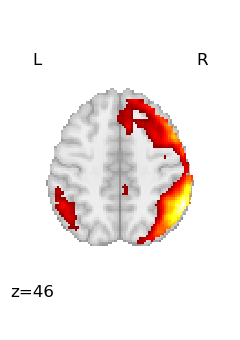

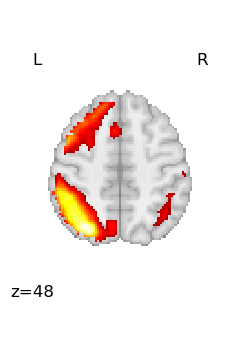

In [25]:
for img in image.iter_img(rsn):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(
        img, threshold=3, display_mode="z", cut_coords=1, colorbar=False
    )

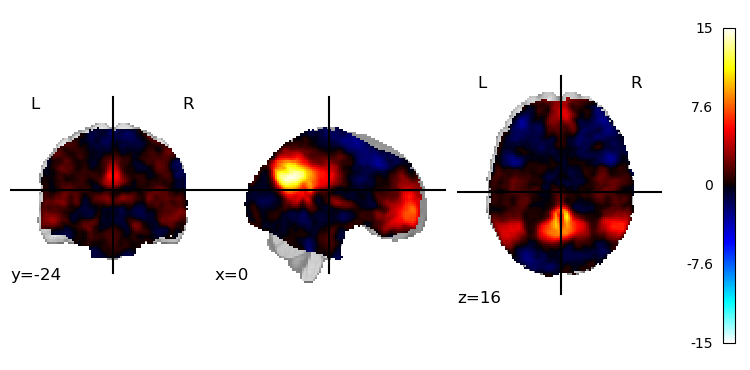

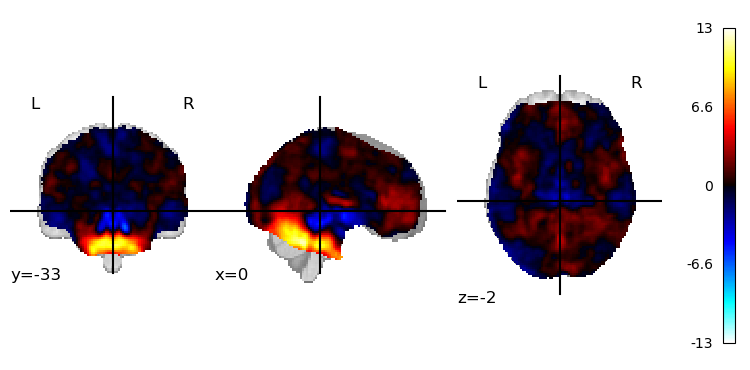

In [27]:
selected_volumes = image.index_img(rsn, slice(3, 5))

for img in image.iter_img(selected_volumes):
    plotting.plot_stat_map(img)

In [28]:
plotting.show()

Path to MNI152 template: PosixPath('/Users/sreeku/anaconda3/lib/python3.11/site-packages/nilearn/datasets/data/mni_icbm152_t1_tal_nlin_sym_09a_converted.nii.gz')


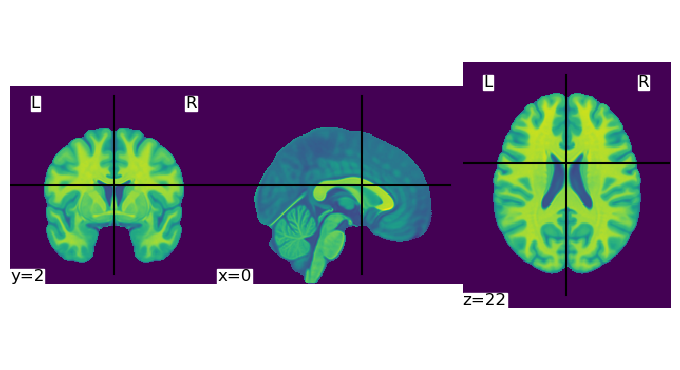

In [31]:
# Let us use a Nifti file that is shipped with nilearn
from nilearn.datasets import MNI152_FILE_PATH

# Note that the variable MNI152_FILE_PATH is just a path to a Nifti file
print(f"Path to MNI152 template: {MNI152_FILE_PATH!r}")

from nilearn import plotting

plotting.plot_img(MNI152_FILE_PATH)



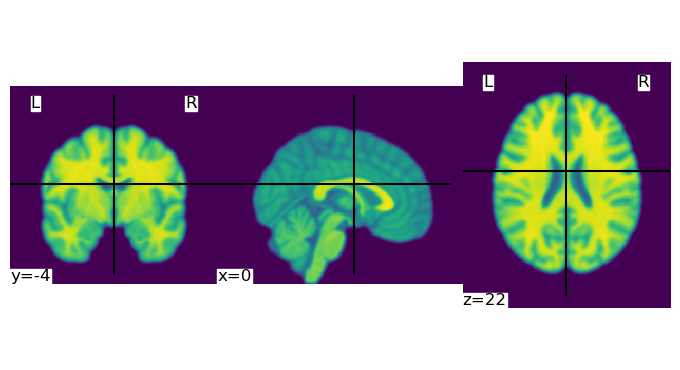

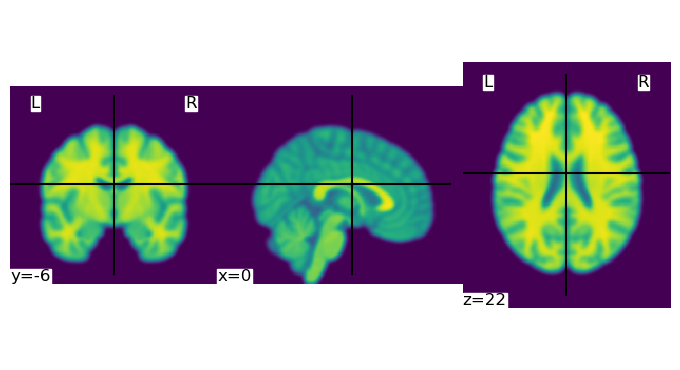

In [33]:
from nilearn import image

smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=3)

# While we are giving a file name as input, the function returns
# an in-memory object:
smooth_anat_img

plotting.plot_img(smooth_anat_img)

more_smooth_anat_img = image.smooth_img(smooth_anat_img, fwhm=3)
plotting.plot_img(more_smooth_anat_img)

In [34]:
from nilearn import datasets

haxby = datasets.fetch_haxby(subjects=[1, 2])

from pathlib import Path

anats_all_subjects = (
    Path(datasets.get_data_dirs()[0]) / "haxby2001" / "subj*" / "anat*"
)

anats_all_subjects_smooth = image.smooth_img(anats_all_subjects, fwhm=5)

print(anats_all_subjects_smooth.shape)

output_dir = Path.cwd() / "results" / "plot_nilearn_101"
output_dir.mkdir(exist_ok=True, parents=True)
print(f"Output will be saved to: {output_dir}")
anats_all_subjects_smooth.to_filename(
    output_dir / "anats_all_subjects_smooth.nii.gz"
)

plotting.show()

[get_dataset_dir] Dataset created in /Users/sreeku/nilearn_data/haxby2001

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/7868/mask.nii.gz ...

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/MD5SUMS ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj1-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 8839168 of 314803244 bytes (2.8%%,   34.6s remaining)

[_chunk_report_] Downloaded 42590208 of 314803244 bytes (13.5%%,   12.8s remaining)

[_chunk_report_] Downloaded 75218944 of 314803244 bytes (23.9%%,    9.6s remaining)

[_chunk_report_] Downloaded 108240896 of 314803244 bytes (34.4%%,    7.6s remaining)

[_chunk_report_] Downloaded 140394496 of 314803244 bytes (44.6%%,    6.2s remaining)

[_chunk_report_] Downloaded 173940736 of 314803244 bytes (55.3%%,    4.9s remaining)

[_chunk_report_] Downloaded 204193792 of 314803244 bytes (64.9%%,    3.8s remaining)

[_chunk_report_] Downloaded 236126208 of 314803244 bytes (75.0%%,    2.7s remaining)

[_chunk_report_] Downloaded 269418496 of 314803244 bytes (85.6%%,    1.5s remaining)

[_chunk_report_] Downloaded 301408256 of 314803244 bytes (95.7%%,    0.4s remaining)

[fetch_single_file]  ...done. (11 seconds, 0 min)

[uncompress_file] Extracting data from 
/Users/sreeku/nilearn_data/haxby2001/b2fd65a88d22090da62c3fb828be840e/subj1-2010.01.14.tar.gz...

[uncompress_file] .. done.

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj2-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 7553024 of 291168628 bytes (2.6%%,   37.6s remaining)

[_chunk_report_] Downloaded 36405248 of 291168628 bytes (12.5%%,   14.0s remaining)

[_chunk_report_] Downloaded 68870144 of 291168628 bytes (23.7%%,    9.7s remaining)

[_chunk_report_] Downloaded 101761024 of 291168628 bytes (34.9%%,    7.5s remaining)

[_chunk_report_] Downloaded 135028736 of 291168628 bytes (46.4%%,    5.8s remaining)

[_chunk_report_] Downloaded 167706624 of 291168628 bytes (57.6%%,    4.4s remaining)

[_chunk_report_] Downloaded 200654848 of 291168628 bytes (68.9%%,    3.2s remaining)

[_chunk_report_] Downloaded 231276544 of 291168628 bytes (79.4%%,    2.1s remaining)

[_chunk_report_] Downloaded 264208384 of 291168628 bytes (90.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (10 seconds, 0 min)

[uncompress_file] Extracting data from 
/Users/sreeku/nilearn_data/haxby2001/b2fd65a88d22090da62c3fb828be840e/subj2-2010.01.14.tar.gz...

[uncompress_file] .. done.

(124, 256, 256, 2)
Output will be saved to: /Users/sreeku/Desktop/scikit + nilearn practice/results/plot_nilearn_101


In [ ]:
import numpy as np

from nilearn.surface import InMemoryMesh, PolyMesh

# for the tetrahedron
left_coords = np.asarray(
    [
        [0, 0, 0],  # vertex 0
        [1, 0, 0],  # vertex 1
        [0, 1, 0],  # vertex 2
        [0, 0, 1],  # vertex 3
    ]
)
left_faces = np.asarray(
    [
        [1, 0, 2],  # face created by connecting vertices 1, 0, 2
        [0, 1, 3],  # face created by connecting vertices 0, 1, 3
        [0, 3, 2],  # face created by connecting vertices 0, 3, 2
        [1, 2, 3],  # face created by connecting vertices 1, 2, 3
    ]
)
# for the pyramid
right_coords = (
    np.asarray(
        [
            [0, 0, 0],
            [1, 0, 0],
            [1, 1, 0],
            [0, 1, 0],
            [0, 0, 1],
        ]
    )
    + 2
)
right_faces = np.asarray(
    [
        [0, 1, 4],
        [0, 3, 1],
        [1, 3, 2],
        [1, 2, 4],
        [2, 3, 4],
        [0, 4, 3],
    ]
)
# put the two parts together
mesh = PolyMesh(
    left=InMemoryMesh(left_coords, left_faces),
    right=InMemoryMesh(right_coords, right_faces),
)

rng = np.random.default_rng(0)
left_data = rng.random(mesh.parts["left"].n_vertices)
right_data = rng.random(mesh.parts["right"].n_vertices)
# put them together in a dictionary
data = {
    "left": left_data,
    "right": right_data,
}




In [ ]:
from nilearn.surface import SurfaceImage

surface_image = SurfaceImage(mesh=mesh, data=data)

from nilearn.plotting import view_surf

view_surf(
    surf_map=surface_image,
    hemi="left",
)

view_surf(
    surf_map=surface_image,
    hemi="right",
)

In [ ]:
from pathlib import Path

output_dir = Path.cwd() / "results" / "plot_surface_101"
output_dir.mkdir(exist_ok=True, parents=True)
print(f"Output will be saved to: {output_dir}")
surface_image.mesh.to_filename(output_dir / "surface_image_mesh.gii")
surface_image.data.to_filename(output_dir / "surface_image_data.gii")

In [ ]:
mesh = {
    "left": output_dir / "surface_image_mesh_hemi-L.gii",
    "right": output_dir / "surface_image_mesh_hemi-R.gii",
}
data = {
    "left": output_dir / "surface_image_data_hemi-L.gii",
    "right": output_dir / "surface_image_data_hemi-R.gii",
}

surface_image_loaded = SurfaceImage(
    mesh=mesh,
    data=data,
)